In [86]:
import pandas as pd
lego_sets= pd.read_csv('https://raw.githubusercontent.com/KeithGalli/lego-analysis/master/datasets/lego_sets.csv')
parent_theme= pd.read_csv('https://raw.githubusercontent.com/KeithGalli/lego-analysis/master/datasets/parent_themes.csv')
lego_sets.head()
parent_theme.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


In [ ]:
# what percentage to all licenced sets ever released  were  Star wars themed ?
new_data

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False
...,...,...,...,...,...,...,...,...
11981,8410-1,Swampfire,2010,22.0,Ben 10,Ben 10,270,True
11982,8411-1,ChromaStone,2010,21.0,Ben 10,Ben 10,270,True
11983,8517-1,Humungousaur,2010,14.0,Ben 10,Ben 10,270,True
11984,8518-1,Jet Ray,2010,NaN,Ben 10,Ben 10,270,True


In [3]:
#we merge data frame lego_sets and parent_theme use the merge
new_data=lego_sets.merge(parent_theme,left_on="parent_theme",right_on="name")
new_data.drop(columns='name_y',inplace=True)

licensed=new_data[new_data['is_licensed']==True]
#check the null value in the data set its show the one columns is num_parts its not impacte
licensed[licensed.isnull().any(axis=1)]
# find the total number of licensed in the give us the count
licensed=licensed.dropna(subset=['set_num'])

#make the group and find the percentage of the star wars
def per_group(df):
  count_date=df['is_licensed'].count()
  per=(count_date/cou)*100
  return round(per,2)
cou=licensed["is_licensed"].count()
per_group=licensed.groupby('parent_theme').apply(per_group).reset_index(name="percentage")
per_group
# percentage of the Star Wars is the 45.72

,parent_theme,percentage
0,Angry Birds,0.51
1,Avatar,0.17
2,Ben 10,0.51
3,Cars,2.29
4,Disney,0.08
5,Disney Princess,2.46
6,Disney's Mickey Mouse,0.51
7,Ghostbusters,0.08
8,Harry Potter,5.68
9,Indiana Jones,1.61


In [4]:
# other way to solve this question is sample way star wars only use
licensed=new_data[new_data['is_licensed']==True]
licensed=licensed.dropna(subset=['set_num'])
star_wars=licensed[licensed['parent_theme']=='Star Wars']
star_wars=star_wars.dropna(subset=['set_num'])
total_count=licensed['is_licensed'].count()
star_wars_count=star_wars['is_licensed'].count()
per_star_wars=(round((star_wars_count/total_count)*100,2))
per_star_wars

51.65

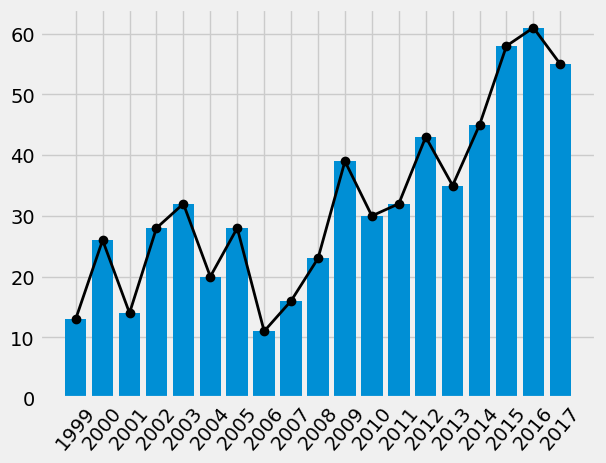

    year  count_pop
0   1999         13
1   2000         26
2   2001         14
3   2002         28
4   2003         32
5   2004         20
6   2005         28
7   2006         11
8   2007         16
9   2008         23
10  2009         39
11  2010         30
12  2011         32
13  2012         43
14  2013         35
15  2014         45
16  2015         58
17  2016         61
18  2017         55


In [8]:
from matplotlib import markers
# In which year was star wars not the most popular licenced theme
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
star_wars_sort=star_wars.sort_values('year')
new_not_popular=star_wars_sort.groupby("year")['year'].count().reset_index(name="count_pop")
plt.xticks(new_not_popular["year"],rotation=50)
plt.bar(new_not_popular['year'],new_not_popular['count_pop'])
plt.plot(new_not_popular['year'],new_not_popular['count_pop'],color='k',marker='o',linewidth=2)
plt.show()
print(new_not_popular)



<ipython-input-84-c23e59f83b22>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_df=licensed_sort.groupby(['year','parent_theme']).sum().reset_index()


[Text(0, 0, '1999'),
 Text(1, 0, '2000'),
 Text(2, 0, '2001'),
 Text(3, 0, '2002'),
 Text(4, 0, '2003'),
 Text(5, 0, '2004'),
 Text(6, 0, '2005'),
 Text(7, 0, '2006'),
 Text(8, 0, '2007'),
 Text(9, 0, '2008'),
 Text(10, 0, '2009'),
 Text(11, 0, '2010'),
 Text(12, 0, '2011'),
 Text(13, 0, '2012'),
 Text(14, 0, '2013'),
 Text(15, 0, '2014'),
 Text(16, 0, '2015'),
 Text(17, 0, '2016'),
 Text(18, 0, '2017')]

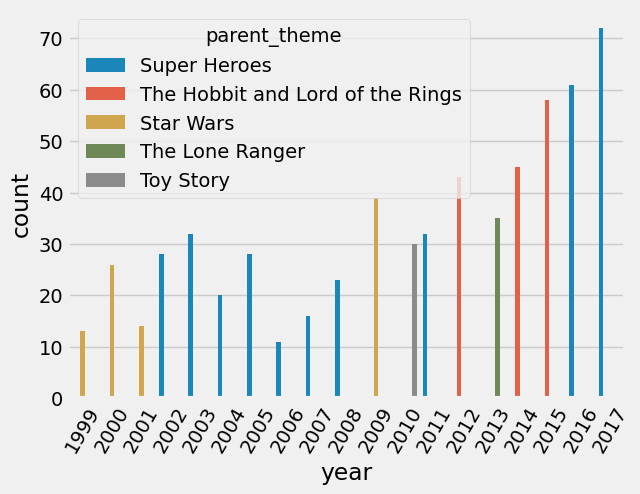

In [84]:
# show the most popular in the each year
import matplotlib.pyplot as plt
import seaborn as sns
licensed_sort=licensed.sort_values("year")
licensed_sort['count']=1
licensed_sort[licensed_sort['year']==2000]
def new_fun(df):
  s=df['count'].sum()
  max=0
  if s>max:
    max=s
  return max

sum_df=licensed_sort.groupby(['year','parent_theme']).sum().reset_index()
# s=sum_df.groupby('year').max()
# s.sort_values('year',inplace=True)

s=s.sort_values('count',ascending=False).drop_duplicates(['year'])

ax=sns.barplot(data=s,x='year',y='count',hue='parent_theme')
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
# print(s)

Text(0.5, 1.0, 'count of set_num per year')

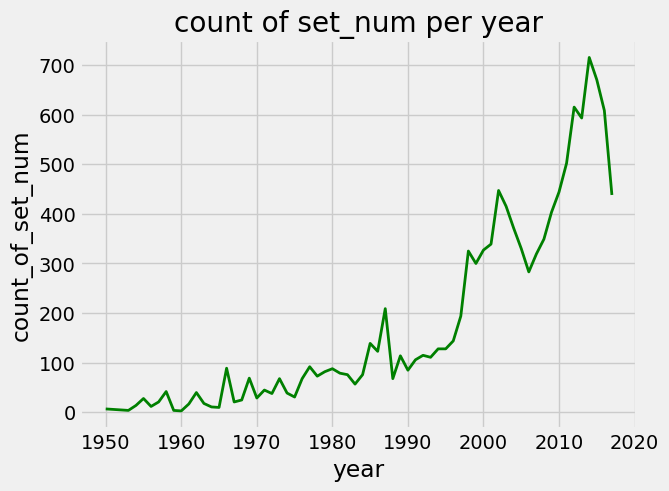

In [118]:
import matplotlib.pyplot as plt
new_data
# break down number of sets by year
break_sets=new_data[new_data['set_num'].isnull()]
# set_data=new_data.drop(break_sets)
break_data=new_data.dropna(thresh=7)
update_data=break_data.groupby('year')['set_num'].count().reset_index(name="count")
plt.plot(update_data['year'],update_data['count'])
plt.xlabel("year")
plt.ylabel('count_of_set_num')
plt.title('count of set_num per year')

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
5,102A-1,Front-End Loader,1970,64.0,Construction,Legoland,411,False
6,102A-2,Front-End Loader,1970,NaN,Construction,Legoland,411,False
14,157-3,Four Car Auto Transport,1970,NaN,Vehicle,Legoland,411,False
20,338-1,Ambulance,1970,74.0,Hospital,Legoland,411,False
23,346-1,Jumbo Jet,1970,NaN,Airport,Legoland,411,False
25,347-1,Fire Station with Mini Cars,1970,205.0,Fire,Legoland,411,False
87,600-1,Ambulance,1970,NaN,Hospital,Legoland,411,False
88,602-2,Fire Truck,1970,NaN,Fire,Legoland,411,False
100,620-2,Fire Truck,1970,NaN,Fire,Legoland,411,False
